### Bike Sharing Multiple Linear Regression
#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes, a US bike-sharing company, is facing significant revenue decline due to the COVID-19 pandemic. To recover and thrive post-pandemic, they aim to understand and predict the demand for shared bikes in the American market.
#### Objective: 
For Bike sharing problem, need to build model to understand the relationship between bike rental sales and different independent variables.

#### 1. Importing Required Libraries

In [320]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#Train test split
from sklearn.model_selection import train_test_split
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Importing statsmodels
import statsmodels.api as sm
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
#to supress warnings
import warnings
warnings.filterwarnings('ignore')

- Data Frame dimentions change to accomodate large amount of data

In [234]:
pd.set_option('Display.max_rows', 500)
pd.set_option('Display.max_columns', 500)
pd.set_option('Display.width', 1000)

#### 2. Importing and Understanding Data

In [235]:
bikes_df=pd.read_csv("day.csv")

In [236]:
bikes_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp      hum  windspeed  casual  registered   cnt
0        1  01-01-2018       1   0     1        0        6           0           2  14.110847  18.18125  80.5833  10.749882     331         654   985
1        2  02-01-2018       1   0     1        0        0           0           2  14.902598  17.68695  69.6087  16.652113     131         670   801
2        3  03-01-2018       1   0     1        0        1           1           1   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3        4  04-01-2018       1   0     1        0        2           1           1   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4        5  05-01-2018       1   0     1        0        3           1           1   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [237]:
bikes_df.rename(columns={"yr":"year","mnth":"month","hum":"humidity"}, inplace=True)

In [238]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [239]:
bikes_df.shape

(730, 16)

##### - Insights:
- This dataset has 730 rows and 16 columns.
- "cnt" is the target/dependent variable.

In [240]:
bikes_df.describe()

instant      season        year       month     holiday     weekday  workingday  weathersit        temp       atemp    humidity   windspeed       casual   registered          cnt
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000   730.000000   730.000000
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260    0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   849.249315  3658.757534  4508.006849
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161    0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   686.479875  1559.758728  1936.011647
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000    0.000000    1.000000    2.424346    3.953480    0.000000    1.500244     2.000000    20.000000    22.000000
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000    0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   316.250000  2502.250000  3169.750000
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000    1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   717.000000  3664.500000  4548.500000
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000    1.000000    2.000000   26.880615   30.445775   72.989575   15.625589  1096.500000  4783.250000  5966.000000
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000    1.000000    3.000000   35.328347   42.044800   97.250000   34.000021  3410.000000  6946.000000  8714.000000

<a id='cln-3-1'></a>
#### 3. Cleaning Data
- Check Missing Values

In [242]:
#check null
bikes_df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values to be imputed.

- Check Unique/Duplicate Values

In [243]:
bikes_df.duplicated().any()

False

There is not any duplicate record.

In [244]:
bikes_df.nunique()

instant       730
dteday        730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Removing Insignificant Columns
- Removing columns instant, dteday, casual and registered as they are not required.

In [245]:
# dropping columns
bikes_df.drop(["instant","casual","registered","dteday"],axis=1,inplace=True)

In [246]:
#verify Changes
bikes_df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp     atemp  humidity  windspeed   cnt
0       1     0      1        0        6           0           2  14.110847  18.18125   80.5833  10.749882   985
1       1     0      1        0        0           0           2  14.902598  17.68695   69.6087  16.652113   801
2       1     0      1        0        1           1           1   8.050924   9.47025   43.7273  16.636703  1349
3       1     0      1        0        2           1           1   8.200000  10.60610   59.0435  10.739832  1562
4       1     0      1        0        3           1           1   9.305237  11.46350   43.6957  12.522300  1600

Identify Numeric and Categorical Data

- Check categorical features using value_counts() and nunique()

In [248]:
bikes_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

##### - from above its clear season, yr, mnth, holiday, weekday, wokingday, weathersit are categorical variables, lets check further below

In [249]:
print("Season: ",bikes_df.season.value_counts())
print("Year: ",bikes_df.year.value_counts())
print("Month: ",bikes_df.month.value_counts())
print("Holiday: ",bikes_df.holiday.value_counts())
print("Weekday",bikes_df.weekday.value_counts())
print("Workingday",bikes_df.workingday.value_counts())
print("Weathersit",bikes_df.weathersit.value_counts())

Season:  season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
Year:  year
0    365
1    365
Name: count, dtype: int64
Month:  month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
Holiday:  holiday
0    709
1     21
Name: count, dtype: int64
Weekday weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
Workingday workingday
1    499
0    231
Name: count, dtype: int64
Weathersit weathersit
1    463
2    246
3     21
Name: count, dtype: int64


<Figure size 1500x1500 with 0 Axes>

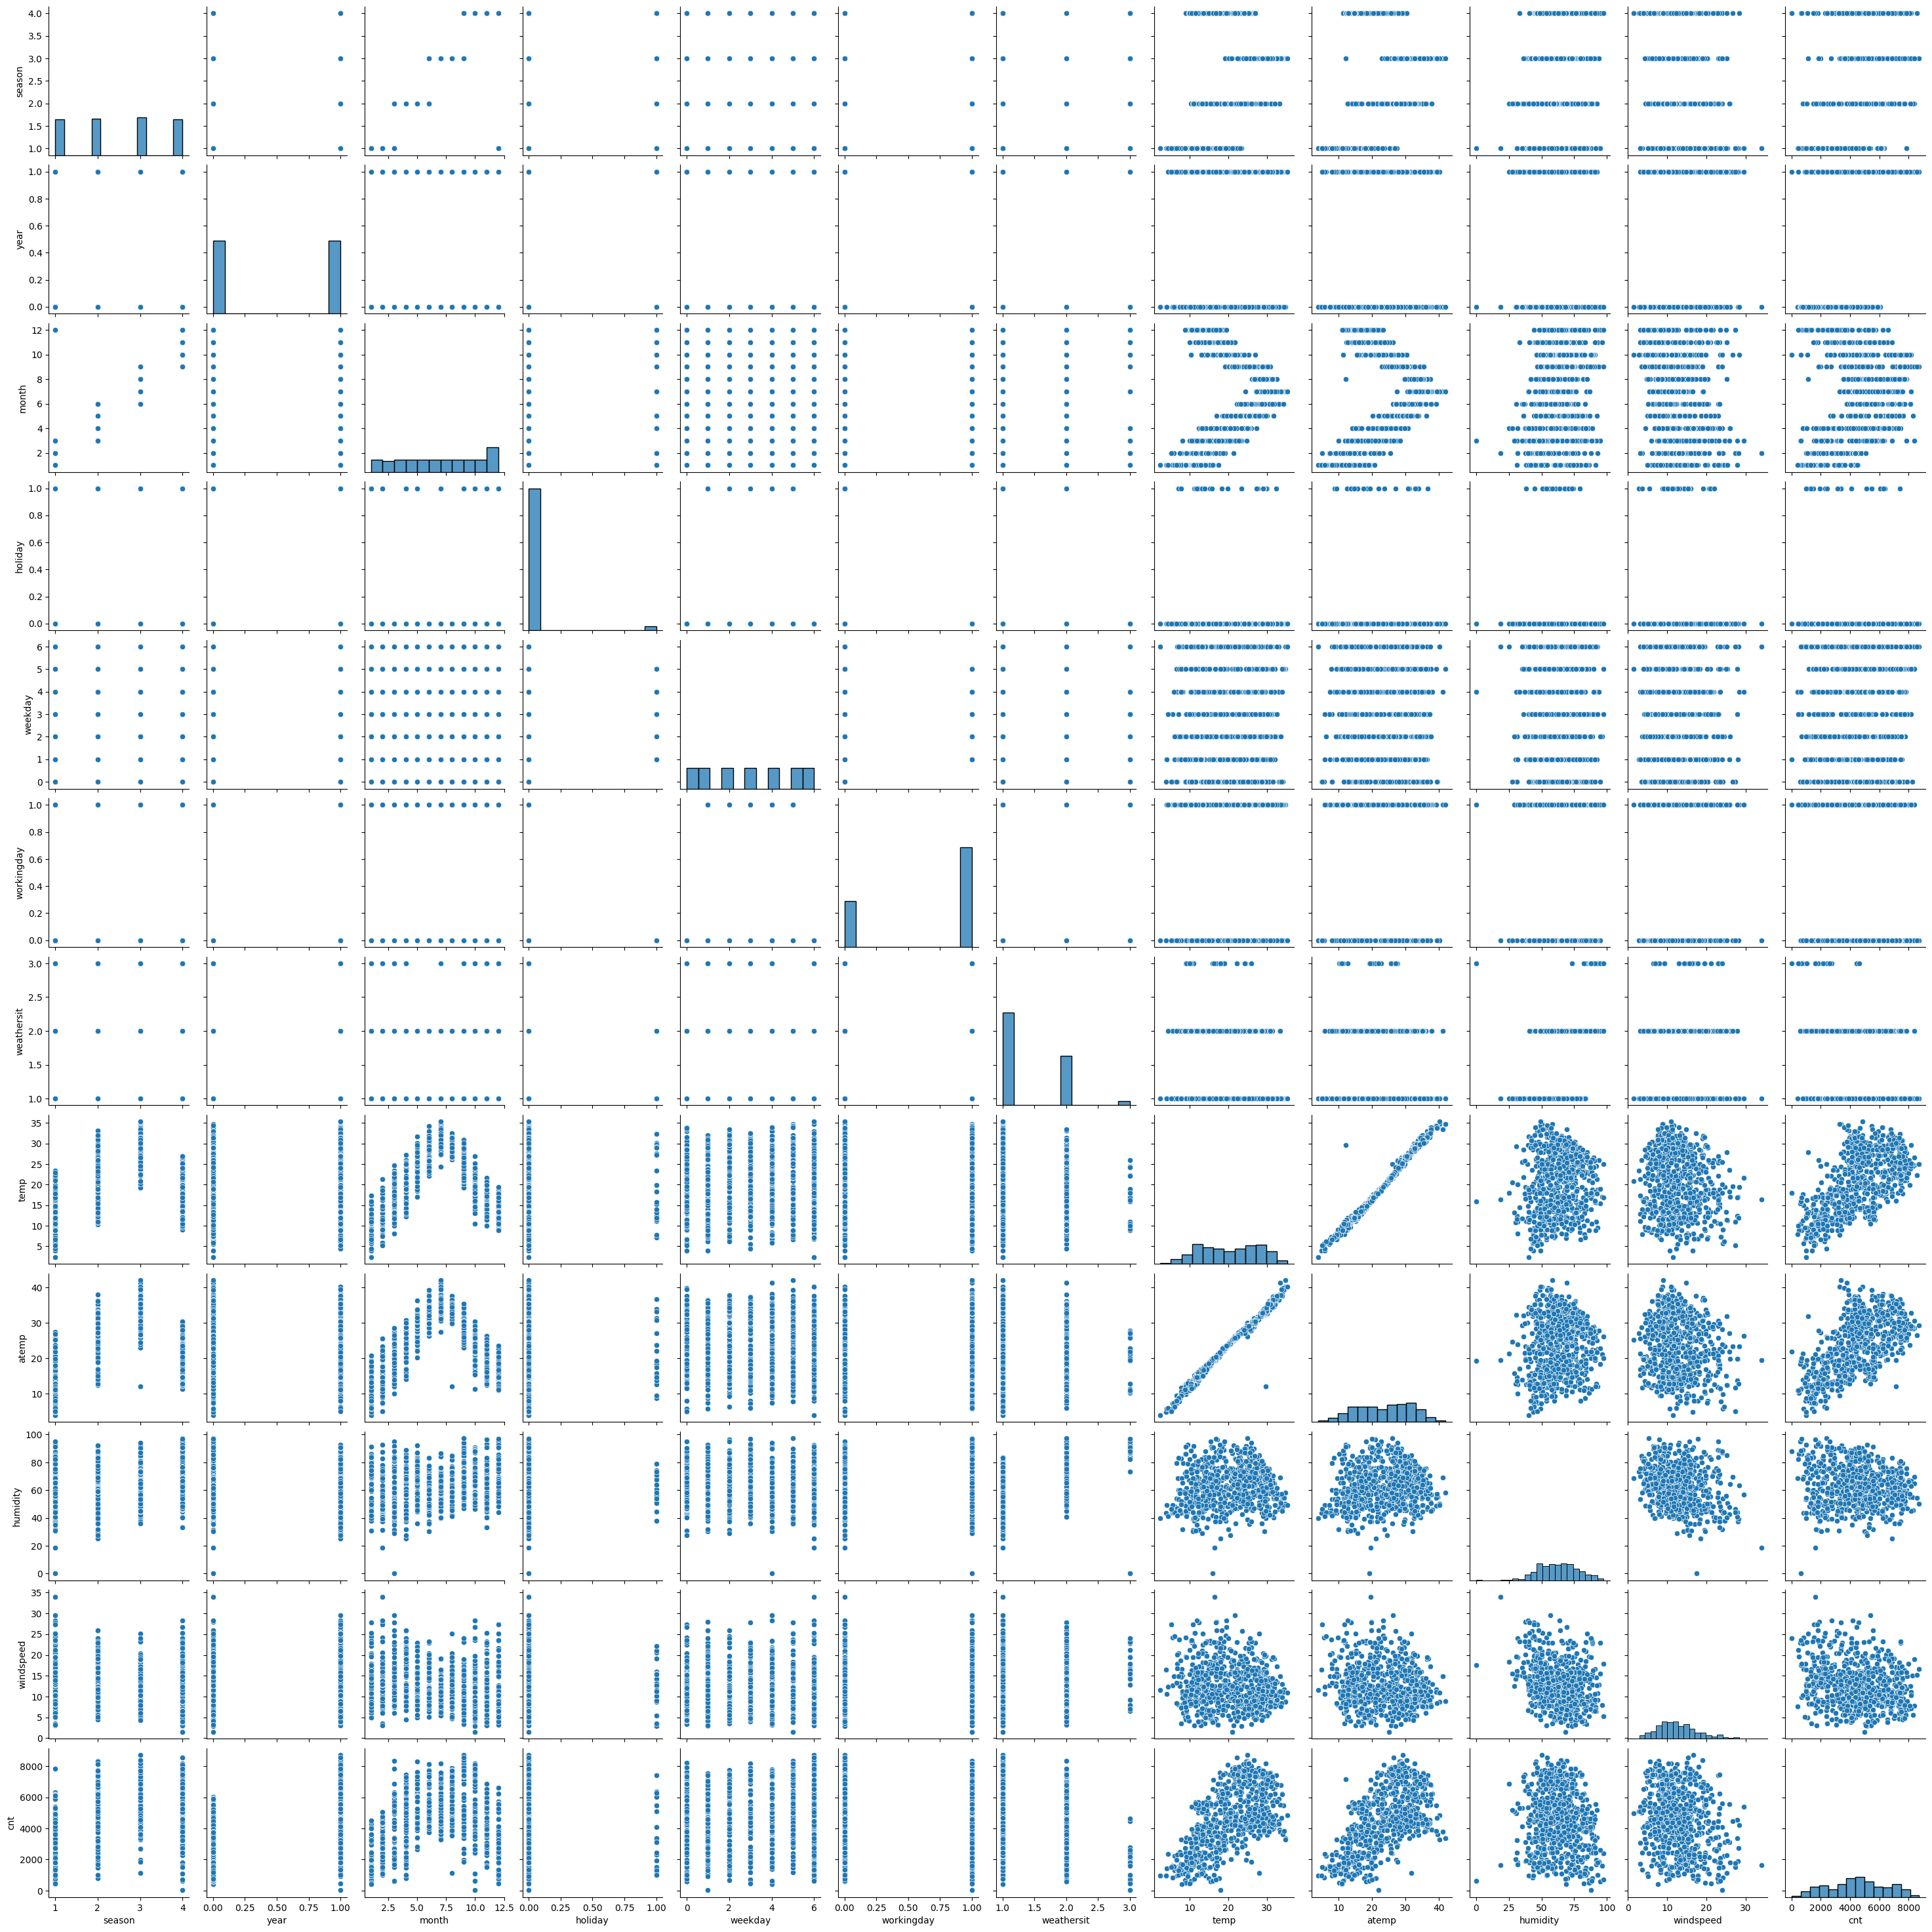

In [250]:
#pairplotting to see the type of the features and the correlation
plt.figure(figsize=(15,15))
sns.pairplot(bikes_df)
plt.show()

Insights:
- From above pairplot it's clear that season, year, month, holiday, weekday, workingday and weathersit are the categorical variables as they are not continous. So will segreate numeric and categorical variables. 
- temp and atemp are highly correlated to cnt and are to each another as well.

In [251]:
var_target=["cnt"]
feature_num=["temp","atemp","humidity","windspeed","cnt"]
feature_num_analysis=["temp","atemp","humidity","windspeed"]
feature_cat=["season","year","month","holiday","weekday","workingday","weathersit","cnt"]
feature_cat_analysis=["season","month","holiday","weekday","workingday","weathersit"]

##### 3.5 Outliers Analysis

As we need categorical fields for further analysis so lets keep them.

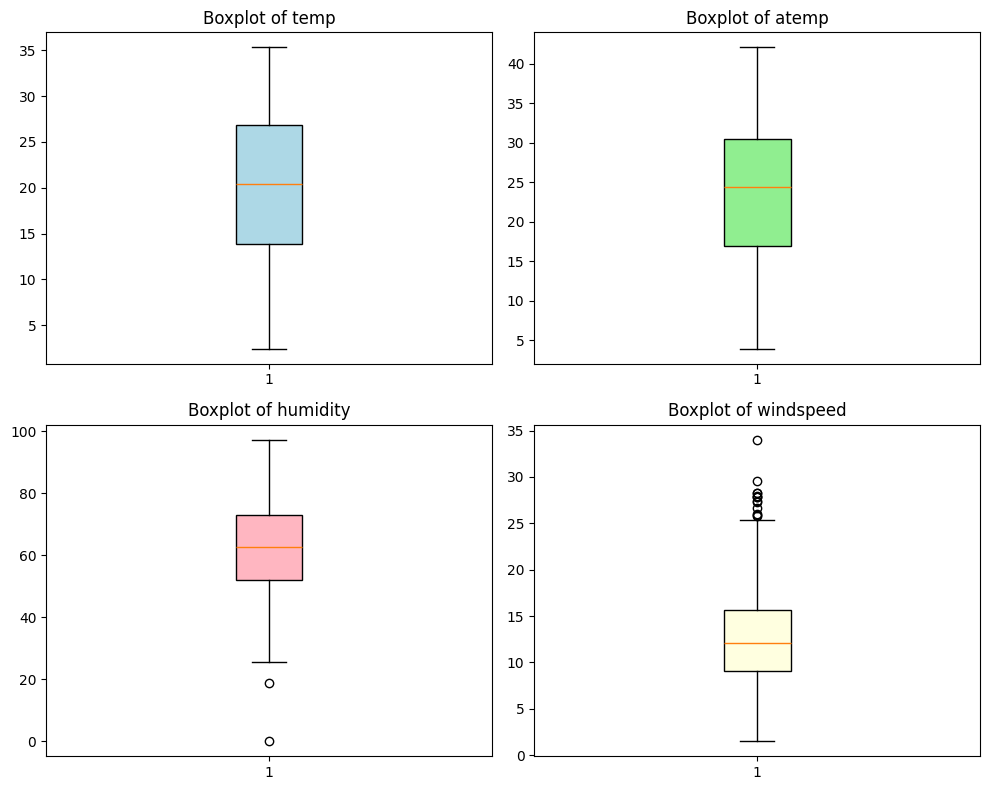

In [252]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow','lightgreen']
axes = axes.flatten()

for i, col in enumerate(feature_num_analysis):
    box = axes[i].boxplot(bikes_df[col], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])

    axes[i].set_title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


Observation
- As far as the significant features are concerned there are no outliers as such, we can ignore windspeed.

#### 4. Exploratory Data Analysis
Univariate Analysis
- Numeric/fact Features
- Categorical/Dimensional Features

Univariate Analysis
- Numeric Features

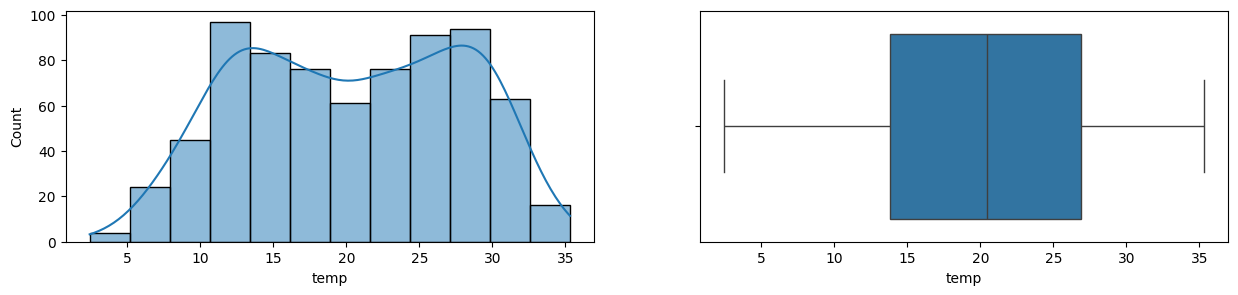

TEMP Details:
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


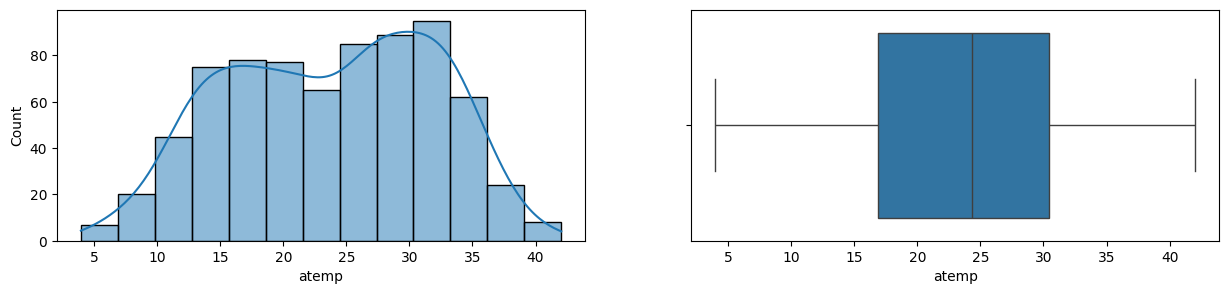

ATEMP Details:
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


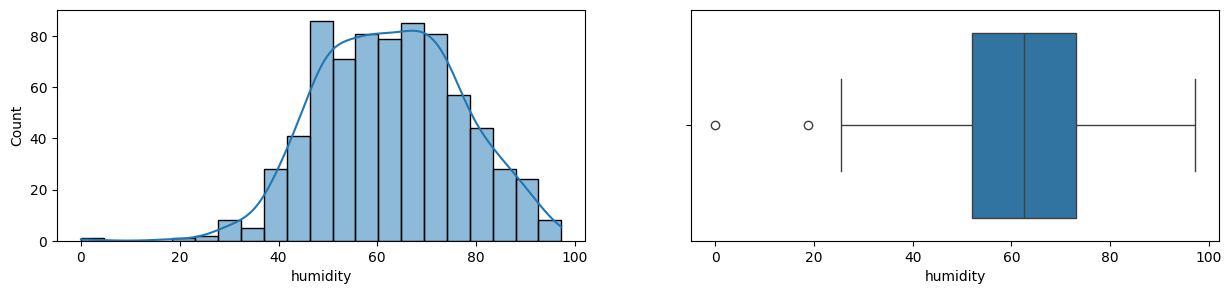

HUMIDITY Details:
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64


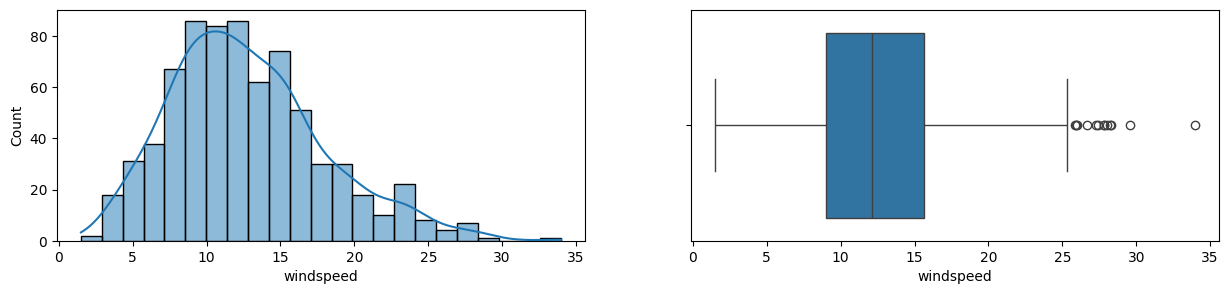

WINDSPEED Details:
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


In [253]:
#univariate analysis of numerical variables:
for i in feature_num_analysis:
    fig, axes = plt.subplots(1,2,figsize=(15,3))
    sns.histplot(data = bikes_df, kde = True, x = bikes_df[i].name, ax=axes[0])
    sns.boxplot(data = bikes_df, x = bikes_df[i].name, ax=axes[1])
    plt.show()
    print(bikes_df[i].name.upper(), "Details:")
    print(bikes_df[i].describe())

##### Observations
- Per above chart warmer temperatures are good for outdoor activities.
- Extremely high and low humidity levels are not good for the outdoor activities i.e. renting/sharing a bike.

##### Univariate Analysis
- Categorical/Dimensional Features

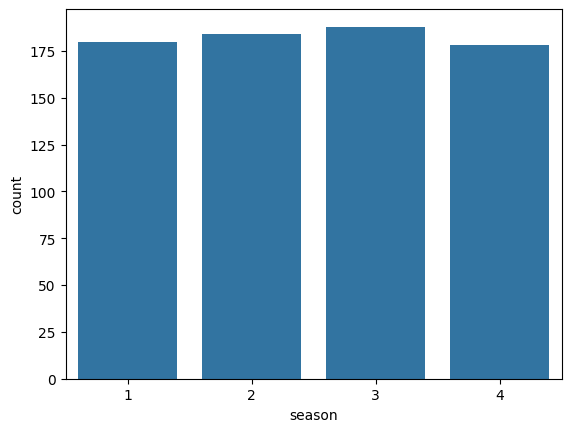

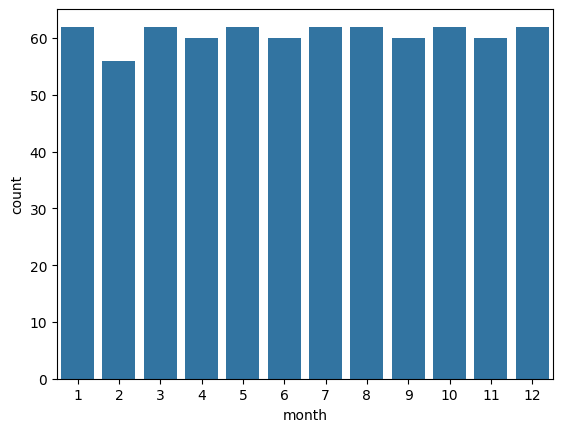

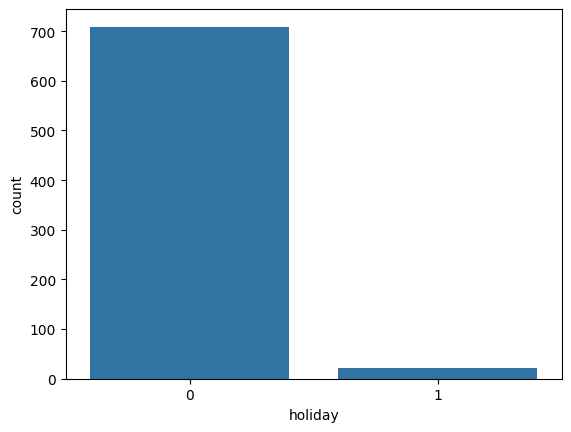

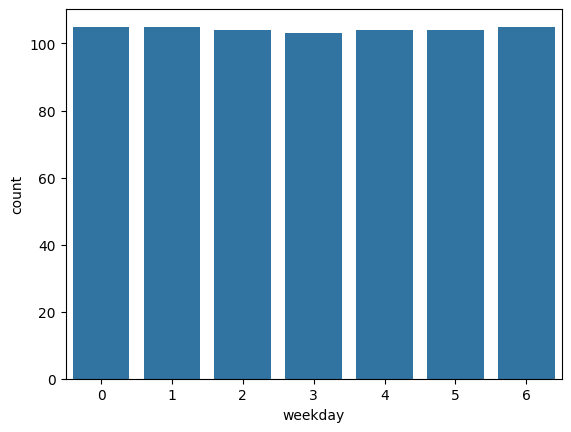

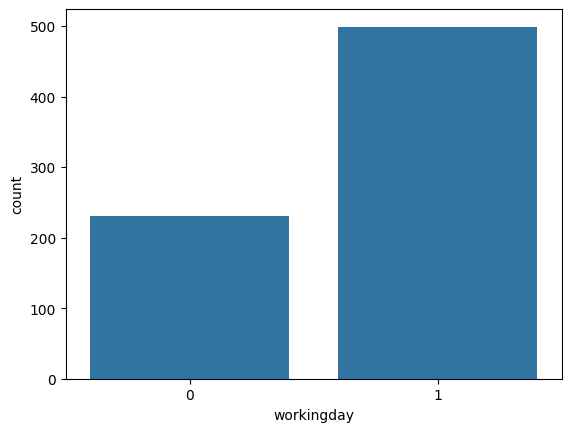

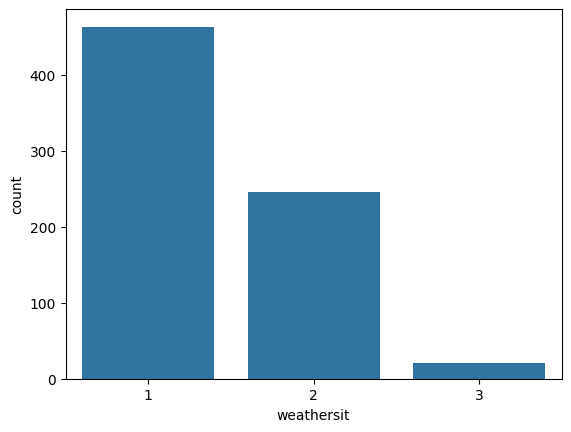

In [254]:
for i in feature_cat_analysis:
    sns.countplot(data = bikes_df, x = bikes_df[i].name)
    plt.show()

##### Insights
- Analysis shows that season data are almost equaly distributed in "Spring", "Summer", "Fall" and "Winter" seasons.
- Analysis shows that bike uses frequancies is almost same in all months except Feburary month. In Feburary month bike uses is lower than other months.
- Analysis shows that bike uses is maximum when there is no holiday but bike uses is minimum when there is holiday.
- Analysis shows that bike uses on working day is almost double than non-working days.
- Per analysis bike uses more in clear weather than the cloudy and lightsnow

##### Bivariate Analysis

- Numeric Features Analysis

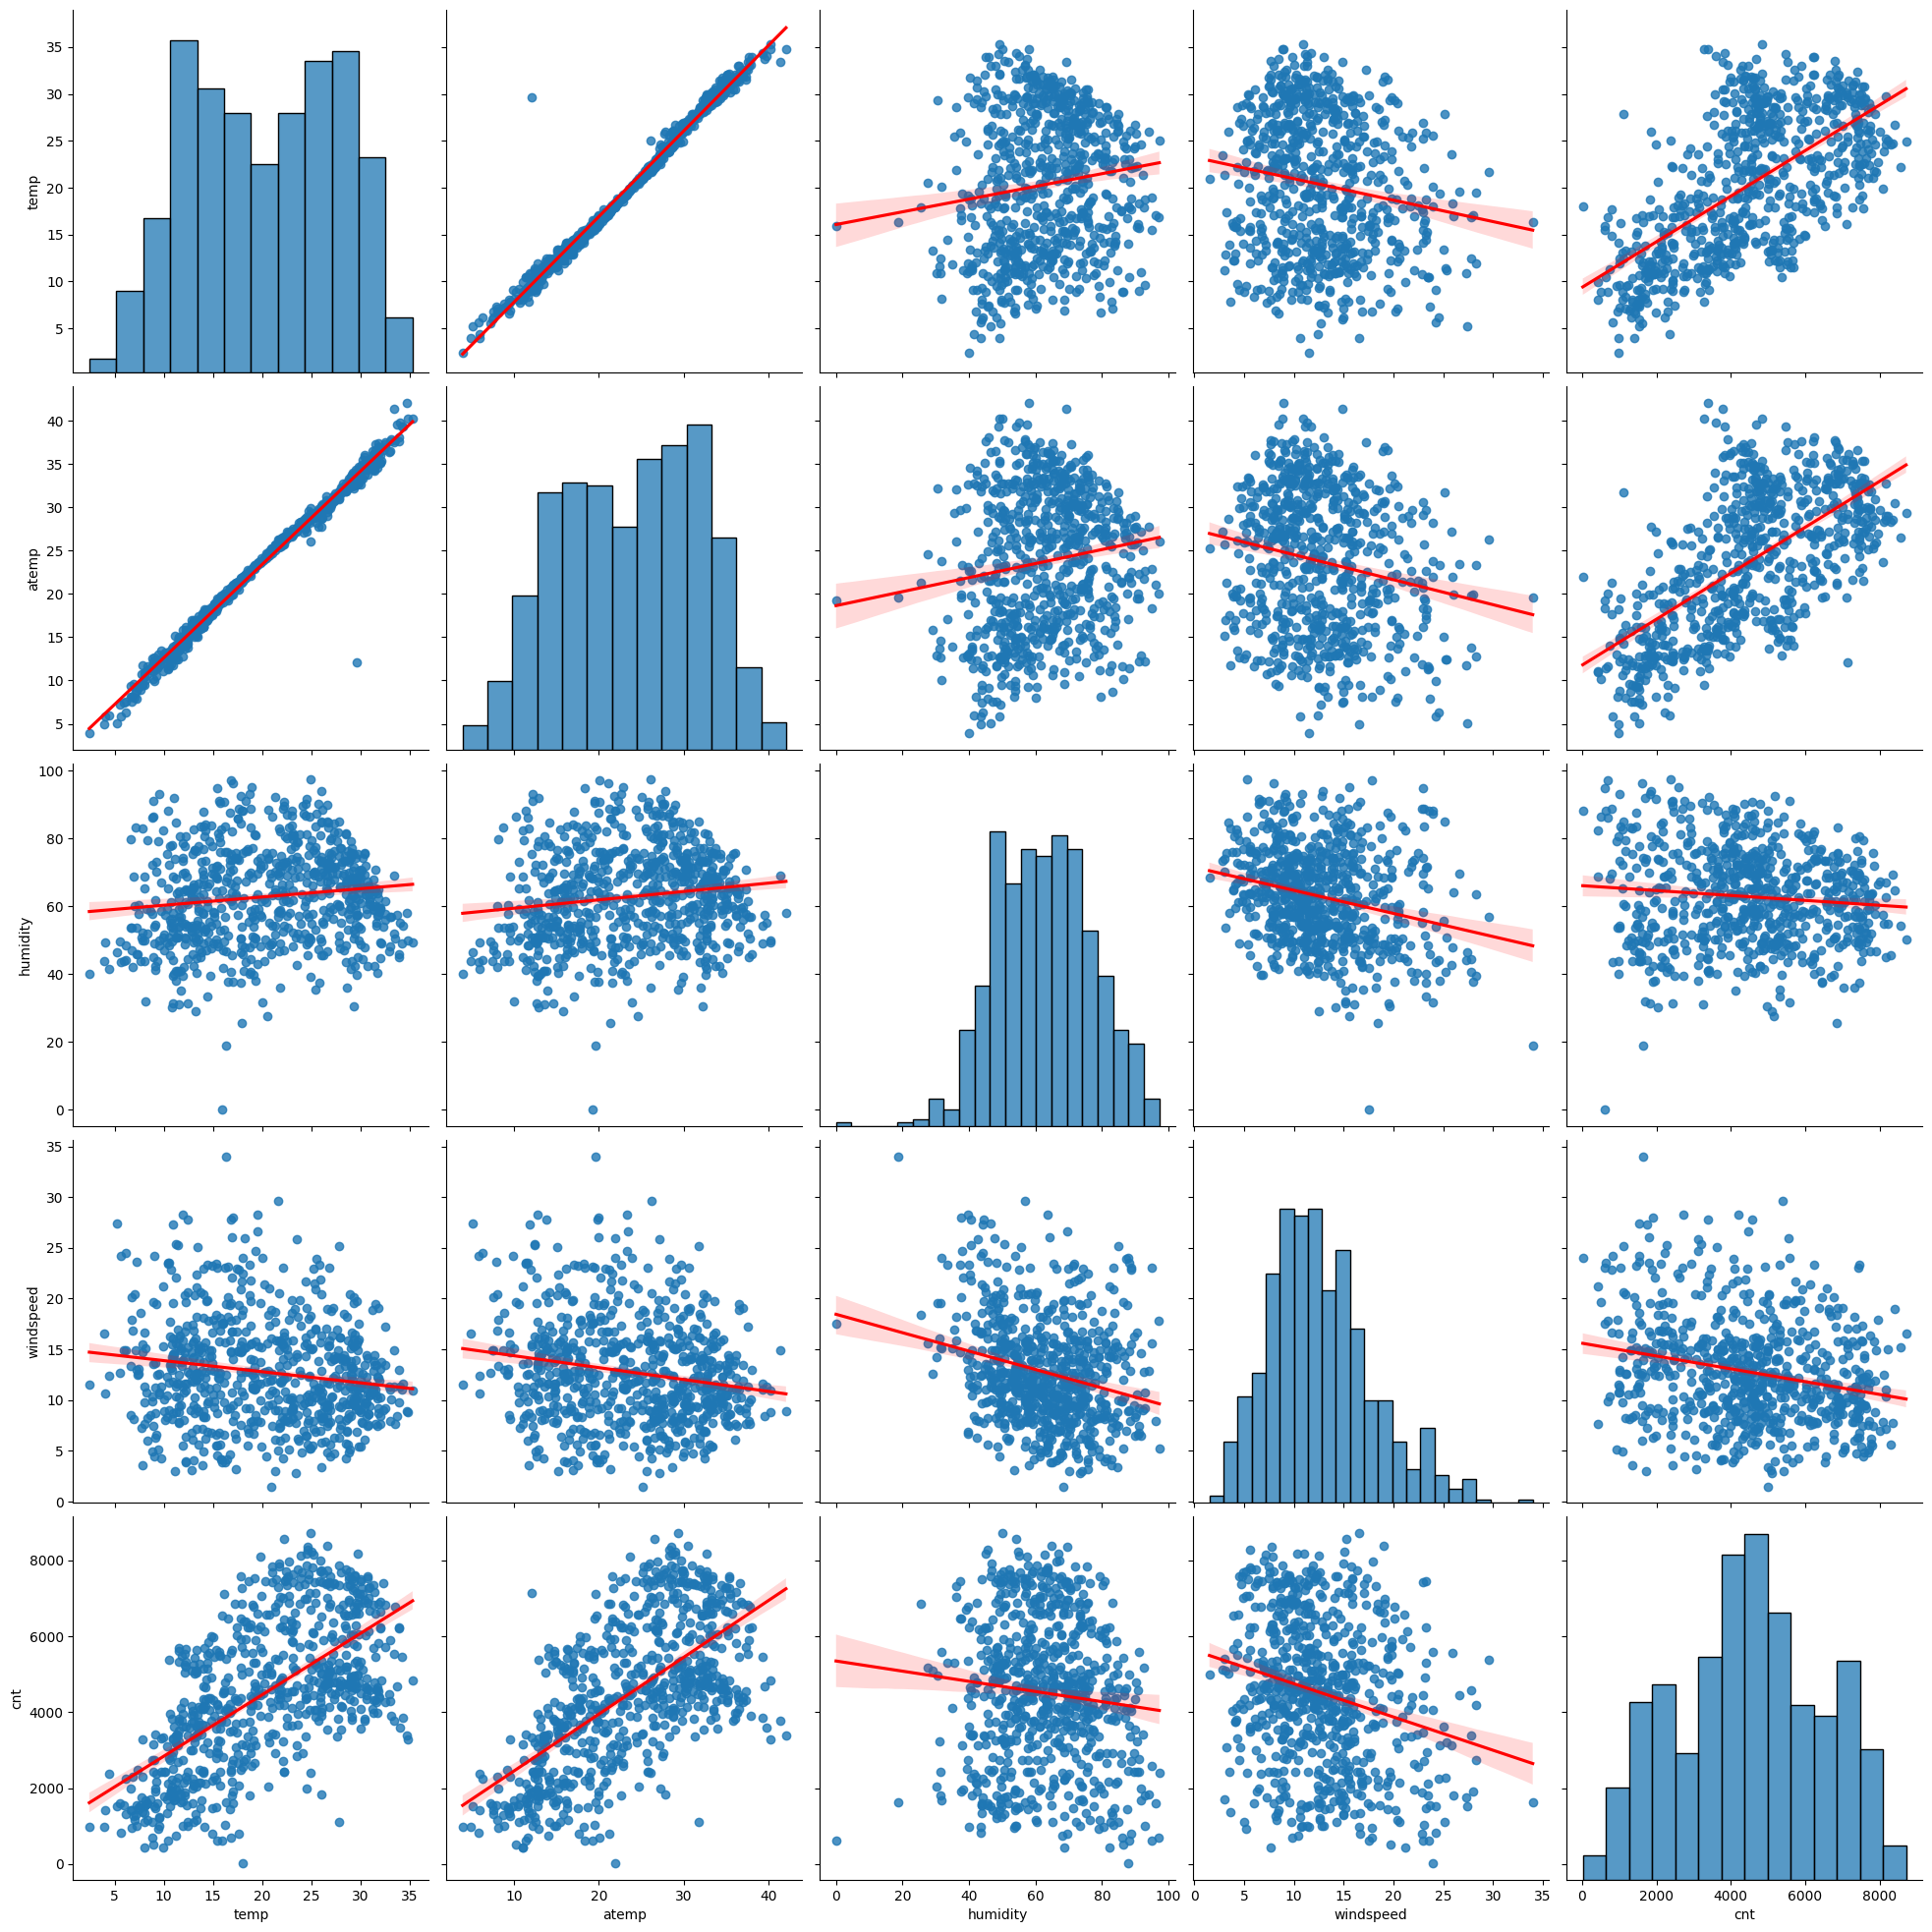

In [255]:
sns.pairplot(data = bikes_df[feature_num], kind='reg',height=4, plot_kws={'line_kws':{'color':'red'}})
plt.show()

##### - Observations
- Bikes rental has a strong relationship with the temp and atemp with a positive slope, however temp and atemp are highly correlated too, so one of the both can be used.
- Bikes rental has a low negative relationship with the humidity and the windspeed, since the linear regression slope is negative so, higher the humidity or windspeed less likey the bikes rentals, however the correlation is not very strong.
- The graph above also demostrates that the linear relationship exists among the numeric independent and dependent variable(s), hence the multi linear regression can be applied.

##### Categorical Features

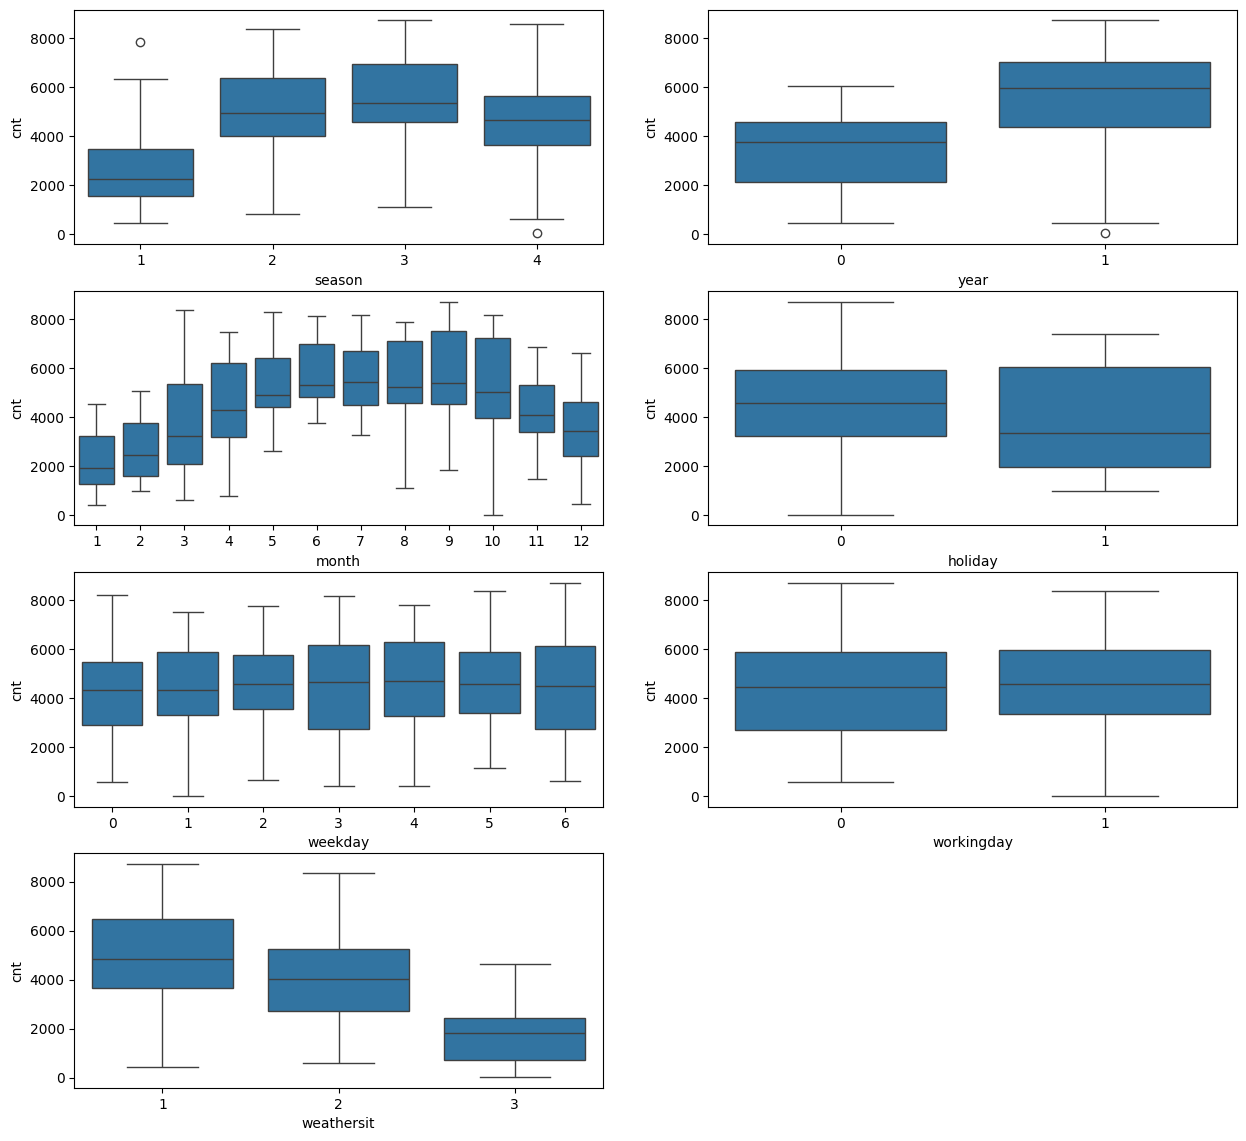

In [256]:
plt.figure(figsize=(15,14))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=bikes_df)
plt.subplot(4,2,2)
sns.boxplot(x='year', y='cnt', data=bikes_df)
plt.subplot(4,2,3)
sns.boxplot(x='month', y='cnt', data=bikes_df)
plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)
plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.show()


##### - Observations
- Fall season has the highest bike rentals followed by,summer, winter annd spring, since organisation should think about expanding during fall, summer and winter. Since spring has less booking, this time can be utilized for repairing the bikes.
- June, august, september, october has more demand as compared around other months of the year, wheras january, feb, december being the low demand months
- Wednesday and Thursdays has more demand.
- 2019 saw a sudden increase in the demand of bike rentals as compared to 2018.
- Working days and holidays doesnt have much impact on the bike rentals demands. 

##### Multivariate

In [257]:
#check original dataframe
bikes_df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp     atemp  humidity  windspeed   cnt
0       1     0      1        0        6           0           2  14.110847  18.18125   80.5833  10.749882   985
1       1     0      1        0        0           0           2  14.902598  17.68695   69.6087  16.652113   801
2       1     0      1        0        1           1           1   8.050924   9.47025   43.7273  16.636703  1349
3       1     0      1        0        2           1           1   8.200000  10.60610   59.0435  10.739832  1562
4       1     0      1        0        3           1           1   9.305237  11.46350   43.6957  12.522300  1600

##### Numeric feature correlation

In [258]:
bikes_df_num=bikes_df[feature_num]

In [259]:
bikes_df_num.corr()["cnt"]

temp         0.627044
atemp        0.630685
humidity    -0.098543
windspeed   -0.235132
cnt          1.000000
Name: cnt, dtype: float64

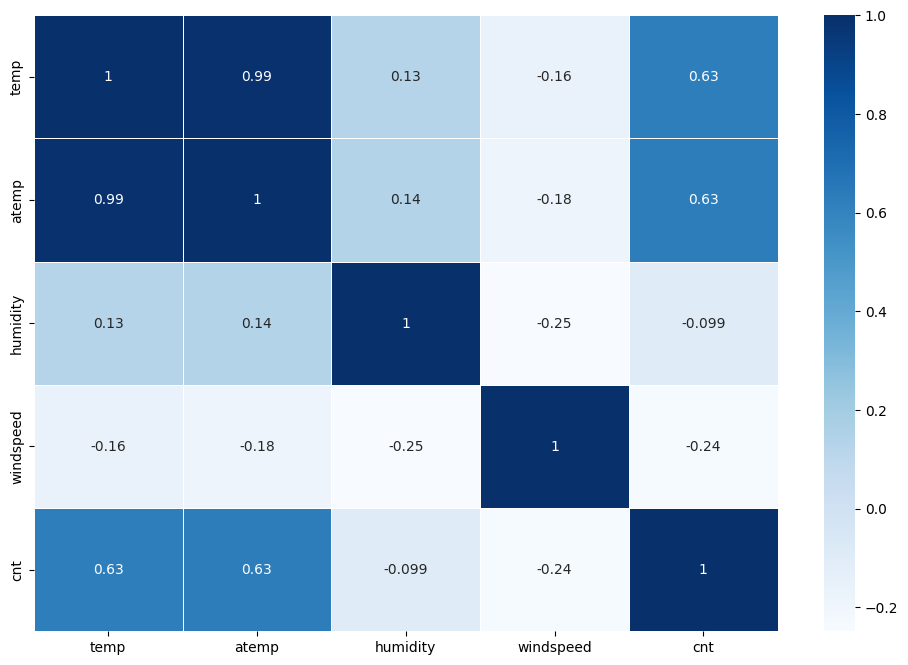

In [260]:
plt.figure(figsize=(12,8))
sns.heatmap(bikes_df_num.corr(),annot=True,cmap="Blues",linewidth=.5)
plt.show()

##### - Observations
- bike rentals are positively correlated to temp and atemp, either of one can be used as temp and atemp are highly correlated to each other and would bring multicollinearity to the solution.
- humidity and windspeed are negitvely correlated

##### Categorical feature correlation

In [263]:
bikes_df_cat=bikes_df[feature_cat]

In [264]:
bikes_df_cat.corr()["cnt"]

season        0.404584
year          0.569728
month         0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weathersit   -0.295929
cnt           1.000000
Name: cnt, dtype: float64

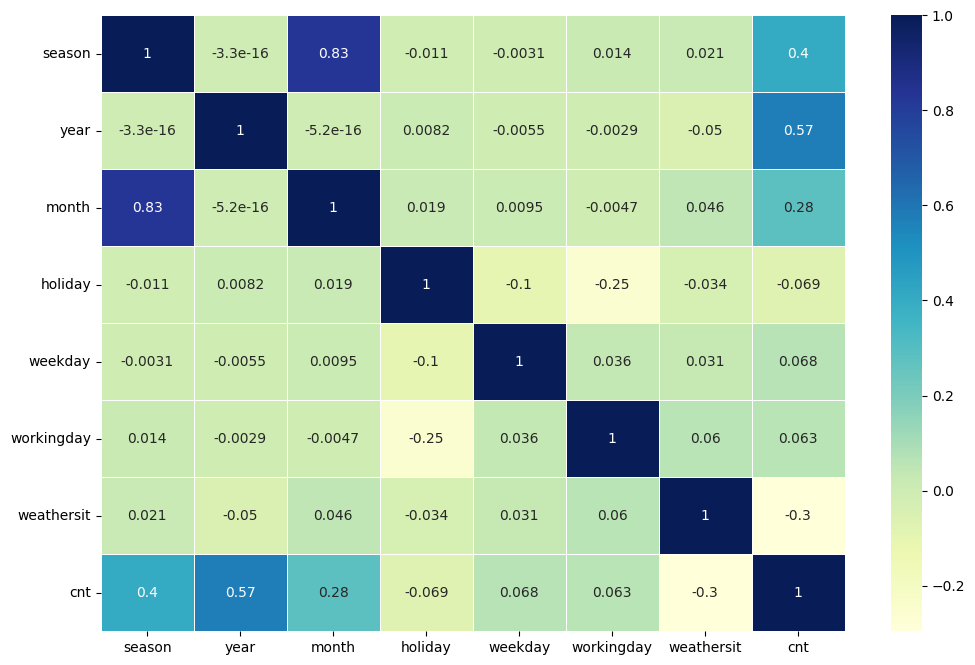

In [265]:
plt.figure(figsize=(12,8))
sns.heatmap(bikes_df_cat.corr(),annot=True,cmap="YlGnBu",linewidth=.5)
plt.show()

##### - Observations
- bike rentals are positively correlated to weekday, workingday,year and month.
- And negatively correalted with holiday and weathersit.  


#### 5. Preprocessing 
- Get Dummies - we shall be using get dummies for the categorical features having more than two categories

In [266]:
def map_cat(df,name=None):
    mapp={"season":{1:"spring",2:"summer",3:"fall",4:"winter"},
          "month":{1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},
          "weekday":{0:"sun",1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat"},
          "weathersit":{1:"clear",2:"cloudy",3:"lightsnow",4:"heavysnow"}
          }
    if(name!=None):
        n="".join(name)
        if(mapp.get(n)!=None):
            df[n]=df[n].map(mapp.get(n))
    else:
        for i in df.columns.tolist():
            if(mapp.get(i)!=None):
                 df[i]=df[i].map(mapp.get(i))
    return df

In [267]:
map_cat(bikes_df).head()

season  year month  holiday weekday  workingday weathersit       temp     atemp  humidity  windspeed   cnt
0  spring     0   jan        0     sat           0     cloudy  14.110847  18.18125   80.5833  10.749882   985
1  spring     0   jan        0     sun           0     cloudy  14.902598  17.68695   69.6087  16.652113   801
2  spring     0   jan        0     mon           1      clear   8.050924   9.47025   43.7273  16.636703  1349
3  spring     0   jan        0     tue           1      clear   8.200000  10.60610   59.0435  10.739832  1562
4  spring     0   jan        0     wed           1      clear   9.305237  11.46350   43.6957  12.522300  1600

In [268]:
dummies=feature_cat.copy()
dummies

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'cnt']

##### - Removing cnt countinuous variable

In [269]:
dummies.remove("cnt")
dummies

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

In [270]:
feature_cat

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'cnt']

In [271]:
dummies_col=bikes_df[dummies].nunique()
dummies_col

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

Removing columns with less than or equal to 2 categories, keeping the rest

In [272]:
dummy_col=dummies_col.loc[dummies_col>2].index.tolist()
dummy_col.remove("weathersit")
dummy_col

['season', 'month', 'weekday']

Get Dummies for categorical variables having >2 categories
- drop_first is to be set true otherwise it would create redundant columns and increase the chances of introducing high multicollinearity 

In [274]:
df_months=pd.get_dummies(bikes_df.month,drop_first=True,dtype=int)
df_season=pd.get_dummies(bikes_df.season,drop_first=True,dtype=int)
df_weekday=pd.get_dummies(bikes_df.weekday,drop_first=True,dtype=int)
df_weathersit=pd.get_dummies(bikes_df.weathersit,drop_first=True,dtype=int)

Merge the dummies to original data frame

In [275]:
dfs=[bikes_df,df_months,df_season,df_weekday,df_weathersit]
merged_dummies=pd.concat(dfs,axis=1)
merged_dummies.drop(["season","weekday","weathersit","month"],axis=1,inplace=True)


In [276]:
merged_dummies.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed', 'cloudy', 'lightsnow'], dtype='object')

In [277]:
merged_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    int32  
 9   dec         730 non-null    int32  
 10  feb         730 non-null    int32  
 11  jan         730 non-null    int32  
 12  jul         730 non-null    int32  
 13  jun         730 non-null    int32  
 14  mar         730 non-null    int32  
 15  may         730 non-null    int32  
 16  nov         730 non-null    int32  
 17  oct         730 non-null    int32  
 18  sep         730 non-null    int32  
 19  spring      730 non-null    i

##### Train-Test Split
- separate the independent and the target variables as X and y

In [278]:
X=merged_dummies.drop(["cnt"],axis=1)
y=merged_dummies["cnt"]

In [279]:
X.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed', 'cloudy', 'lightsnow'], dtype='object')

Creating (70:30) train:test split

In [280]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [282]:
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


##### - 70% of training data

##### Scaling
- Using Min Max scaler

In [283]:
scaler=MinMaxScaler()

We shall fit and transform train data whereas just transform test data as test data is unseen data and can not be fit onto the scaler

In [284]:
X_train[feature_num_analysis]=scaler.fit_transform(X_train[feature_num_analysis])
X_test[feature_num_analysis]=scaler.transform(X_test[feature_num_analysis])

In [285]:
X_train.shape

(510, 29)

In [286]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [287]:
#check the training data frame
X_train_df.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  spring  summer  winter  mon  sat  sun  thur  tue  wed  cloudy  lightsnow
645     1        1           0  0.403972  0.404998  0.731215   0.419004    0    0    0    0    0    0    0    0    0    1    0       0       0       1    1    0    0     0    0    0       1          0
163     0        0           1  0.717562  0.685963  0.509660   0.708724    0    0    0    0    0    1    0    0    0    0    0       0       1       0    1    0    0     0    0    0       0          0
360     0        0           1  0.331287  0.326273  0.785745   0.415925    0    1    0    0    0    0    0    0    0    0    0       1       0       0    0    0    0     0    1    0       1          0
640     1        0           1  0.745598  0.682653  0.817947   0.110593    0    0    0    0    0    0    0    0    0    1    0       0       0       1    0    0    0     0    0    1       1          0
625     1        0           1  0.703024  0.637937  0.899098   0.839562    0    0    0    0    0    0    0    0    0    0    1       0       0       0    0    0    0     0    1    0       1          0

##### Feature selection
- We will be using sklearn feature selection RFE for feature selection.
- For modelling we would use statsmodels.api, due to its vast and statistically rich summary and usages 

In [288]:
estimator=LinearRegression()
estimator.fit(X_train_df,y_train)
rfe=RFE(estimator,n_features_to_select=15)
rfe=rfe.fit(X_train_df,y_train)

In [289]:
rfe_cols=X_train_df.columns[rfe.support_]
rfe_cols

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'dec', 'jul', 'nov', 'spring', 'winter', 'sat', 'sun', 'cloudy', 'lightsnow'], dtype='object')

In [290]:
list(zip(X_train_df.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 13),
 ('dec', True, 1),
 ('feb', False, 9),
 ('jan', False, 11),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 4),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', False, 2),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 15),
 ('tue', False, 7),
 ('wed', False, 12),
 ('cloudy', True, 1),
 ('lightsnow', True, 1)]

In [291]:
X_train=X_train_df[rfe_cols]
X_test=X_test_df[rfe_cols]

In [292]:
X_train.head()

year  holiday  workingday     atemp  humidity  windspeed  dec  jul  nov  spring  winter  sat  sun  cloudy  lightsnow
645     1        1           0  0.404998  0.731215   0.419004    0    0    0       0       1    0    0       1          0
163     0        0           1  0.685963  0.509660   0.708724    0    0    0       0       0    0    0       0          0
360     0        0           1  0.326273  0.785745   0.415925    1    0    0       1       0    0    0       1          0
640     1        0           1  0.682653  0.817947   0.110593    0    0    0       0       1    0    0       1          0
625     1        0           1  0.637937  0.899098   0.839562    0    0    0       0       0    0    0       1          0

In [293]:
print(X_train.shape)
print(X_test.shape)

(510, 15)
(220, 15)


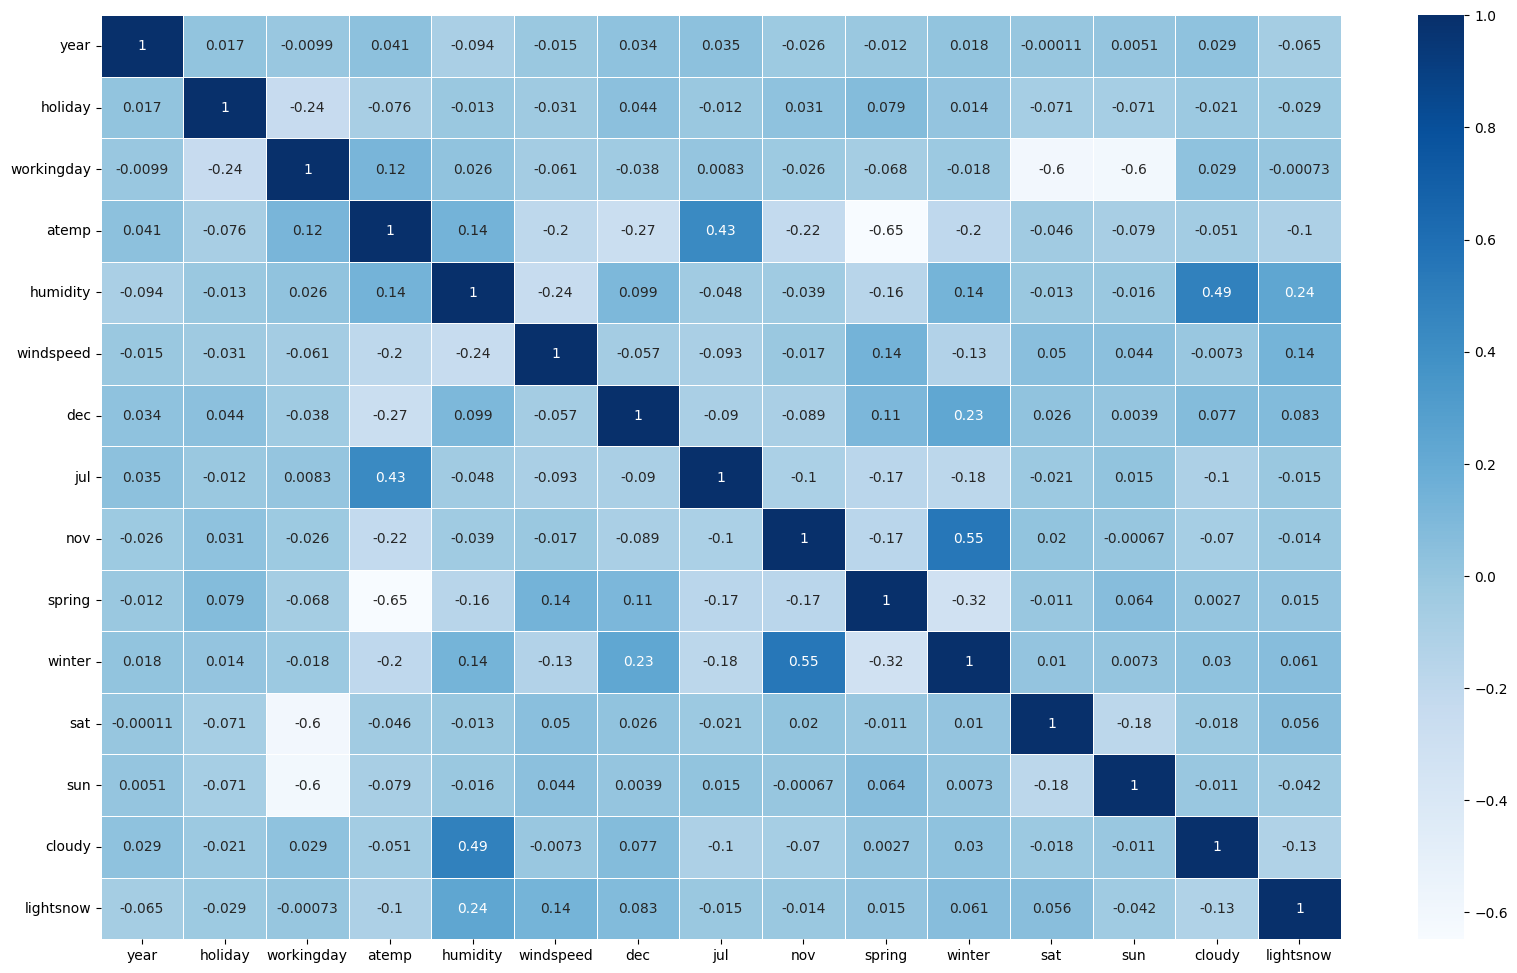

In [223]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train.corr(),annot=True,cmap="Blues",linewidth=.5)
plt.show()


#### 6. Modelling
Using statsmodel.api , since it has vast and statiscally rich feature summary capabilities

Modelling rule
- Insignificant feature to be removed if
p>0.05 & vif> 4 $

Define functions for model and vif

In [294]:
def create_model(col):
    X_train_sm=sm.add_constant(X_train[col])
    model=sm.OLS(np.array(y_train),X_train_sm).fit()
    print(model.summary())
    return model

In [295]:
def vif(col):
    df_vif=X_train[col]
    vif_data=pd.DataFrame()
    vif_data["feature"]=df_vif.columns
    vif_data["VIF"]=[variance_inflation_factor(df_vif.values,i) for i in range(len(df_vif.columns))]
    vif_data["VIF"]=round(vif_data["VIF"],2)
    print(vif_data.sort_values(by="VIF",ascending=False))

We will keep on evaluating the models based on p values, VIF and $ R^2 $, removing the features with high p>0.05 and vif>4 values

Model - 1

In [296]:
#selected features are:
rfe_cols

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'dec', 'jul', 'nov', 'spring', 'winter', 'sat', 'sun', 'cloudy', 'lightsnow'], dtype='object')

In [297]:
rfe_cols=rfe_cols.tolist()
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_1=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.99e-185
Time:                        00:17:35   Log-Likelihood:                -4119.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     495   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2397.3791    246.525      9.725      0.0

##### Insights:
- adjusted $ R^2 = 83.0%
- Insignificant fields as p>0.05
  "workingday" Variance Inflation Factor VIF=50.86


##### Model -2 

In [298]:
rfe_cols.remove("workingday")
X_test_sm.drop(["workingday"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_2=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.99e-185
Time:                        00:17:39   Log-Likelihood:                -4119.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     495   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3228.9793    305.597     10.566      0.0

##### Model -3

In [299]:
rfe_cols.remove("sat")
X_test_sm.drop(["sat"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_3=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.55e-186
Time:                        00:17:45   Log-Likelihood:                -4119.7
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3242.0073    304.082     10.662      0.0

##### Model - 4

In [300]:
rfe_cols.remove("humidity")
X_test_sm.drop(["humidity"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_4=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.23e-184
Time:                        00:17:53   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     497   BIC:                             8335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2527.0911    241.827     10.450      0.0

##### Model -5

In [301]:
rfe_cols.remove("windspeed")
X_test_sm.drop(["windspeed"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_5=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          5.05e-183
Time:                        00:17:58   Log-Likelihood:                -4133.6
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2079.3063    210.270      9.889      0.0

##### Model - 6

In [302]:
rfe_cols.remove("holiday")
X_test_sm.drop(["holiday"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_6=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.31e-182
Time:                        00:18:14   Log-Likelihood:                -4138.0
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     499   BIC:                             8345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2056.7273    211.740      9.713      0.0

##### Model - 7

In [303]:
X_test_sm.drop(["sun"],axis=1,inplace=True)
X_test_sm=sm.add_constant(X_test[rfe_cols])
model_7=create_model(rfe_cols)
vif(rfe_cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.31e-182
Time:                        00:18:47   Log-Likelihood:                -4138.0
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     499   BIC:                             8345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2056.7273    211.740      9.713      0.0

- 7th model looks good as all the p values are 0 and the vif looks good too, we will use model_7 for further evaluation and predictions.

Model Evaluation

In [304]:
X_train_sm=sm.add_constant(X_train[rfe_cols])

In [305]:
y_train_pred=model_7.predict(X_train_sm)

In [306]:
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

In [307]:
print(r2_train)
print(mse_train)

0.826076111305227
653252.7023079947


- R^2 = 0.822 for predicted outcome is same as that of final model prediction.

##### Residual Analysis of train data

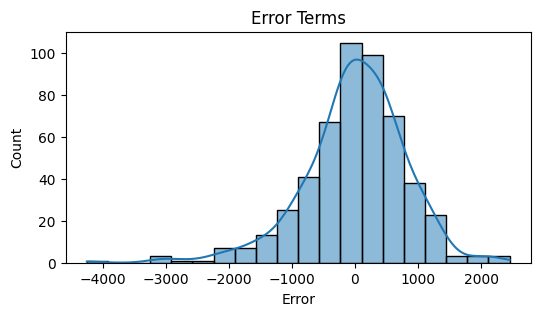

In [308]:
residual_error=y_train-y_train_pred
plt.figure(figsize=(6,3))
sns.histplot(residual_error,kde=True,bins=20)
plt.xlabel("Error")
plt.title("Error Terms")
plt.show()

##### - Error terms are normally distributed, with mean at zero. So the model is fine.

##### Actual vs Predicted

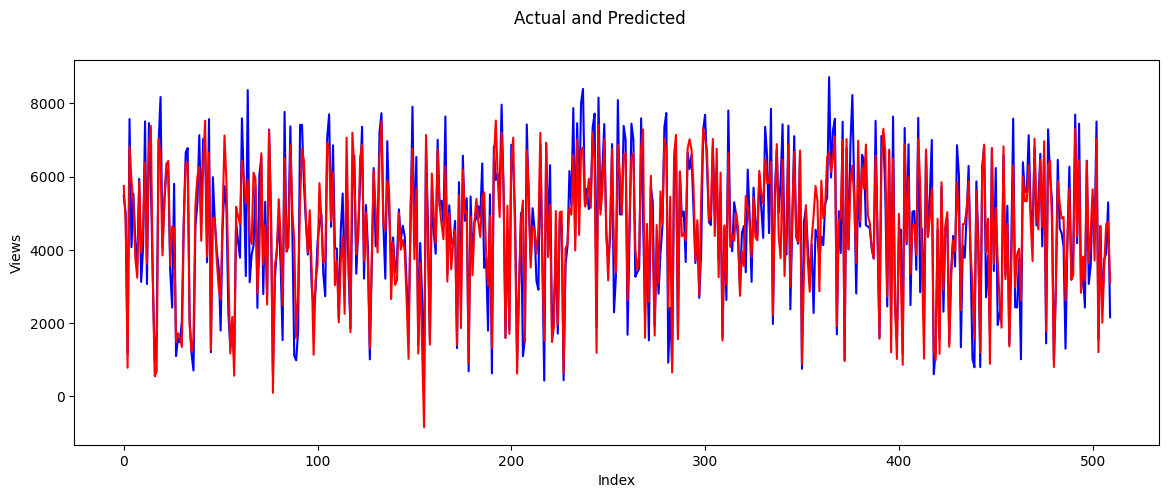

In [309]:
#Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
fig.suptitle('Actual and Predicted', fontsize=12)              
plt.xlabel('Index')                               
plt.ylabel('Views')                               
plt.show()


##### - *Actual and predicted values are almost overlapping, so accuracy looks good.

##### Linearity Check

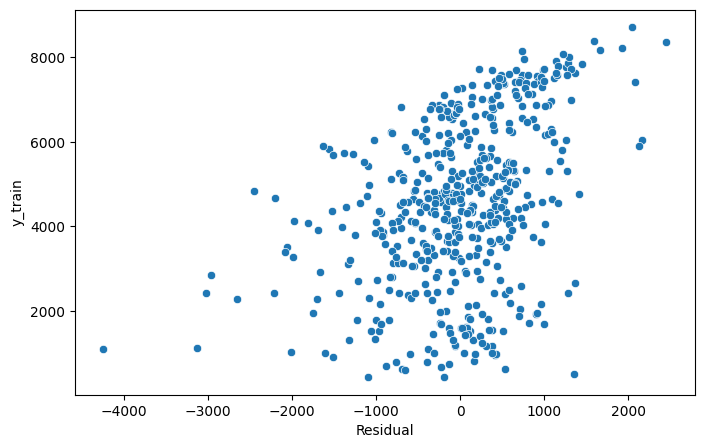

In [310]:
plt.figure(figsize=(8,5))
sns.scatterplot(y=y_train,x=residual_error)
plt.xlabel('Residual')                              
plt.ylabel('y_train')
plt.show()

##### - Residual errors are randomly scattered and no further adjustments will enhance the predicted outcome, hence concluding the model.

##### Error Terms

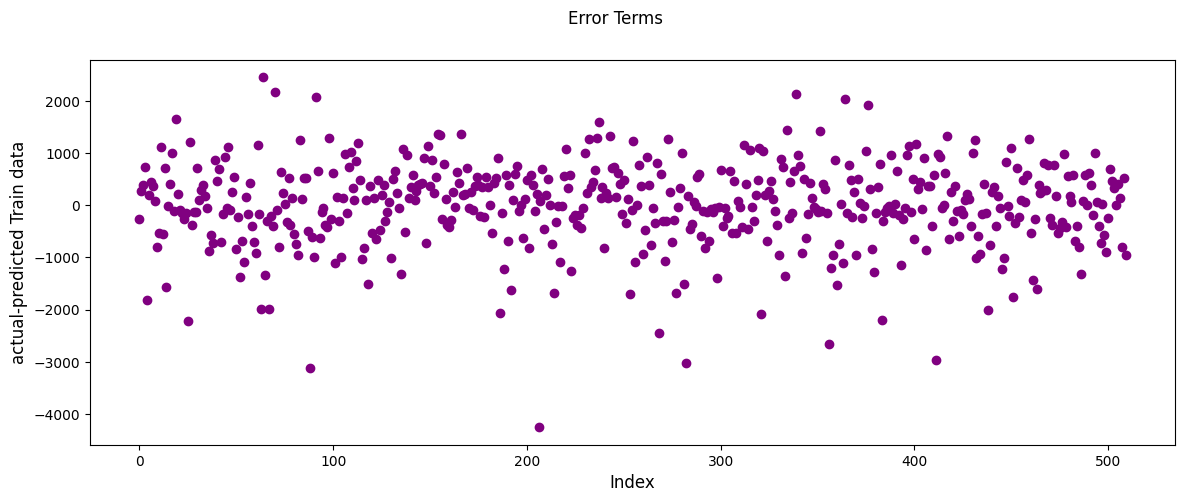

In [311]:
c = [i for i in range(0,len(y_train),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_train-y_train_pred, color="purple",marker='o', linewidth=1.25, linestyle=" ")
fig.suptitle('Error Terms', fontsize=12)              
plt.xlabel('Index', fontsize=12)                      
plt.ylabel('actual-predicted Train data', fontsize=12)
plt.show()

#### Model Predictions

In [312]:
y_test_pred=model_7.predict(X_test_sm)

In [313]:
r2_test = r2_score(y_test, y_test_pred)

In [314]:
mse = mean_squared_error(y_test, y_test_pred)

In [315]:
print(f" Train Set R^2 value: {r2_train}")
print(f" Test Set R^2 value: {r2_test}")
print(f" Train Set mean squared error value: {mse_train}")
print(f" Test Set mean squared error value: {mse}")

 Train Set R^2 value: 0.826076111305227
 Test Set R^2 value: 0.8087527882921766
 Train Set mean squared error value: 653252.7023079947
 Test Set mean squared error value: 707348.0607446054


##### Training and Test Set $ R^2 $ and Adjusted $ R^2 $ are almost same

##### Homoscedasticity 

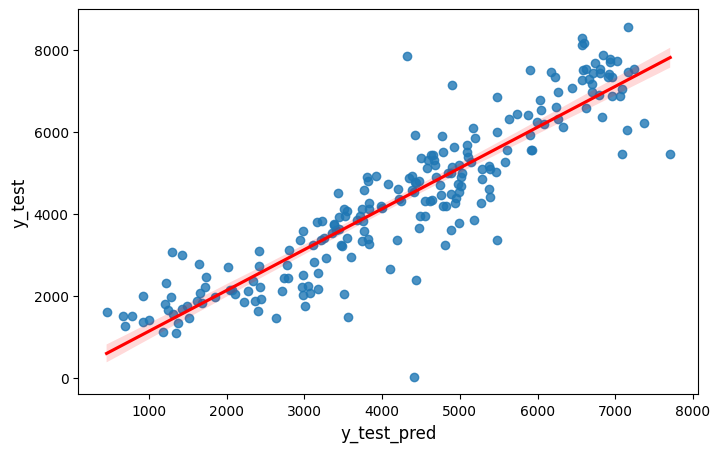

In [316]:
#checking the error spread
plt.figure(figsize=(8,5))
sns.regplot(y=y_test,x=y_test_pred,line_kws={"color": "red"})
plt.xlabel('y_test_pred', fontsize=12)
plt.ylabel('y_test', fontsize=12)
plt.show()

##### - variance looks almost constant acroos the plot

##### Test Actual Vs Predicted

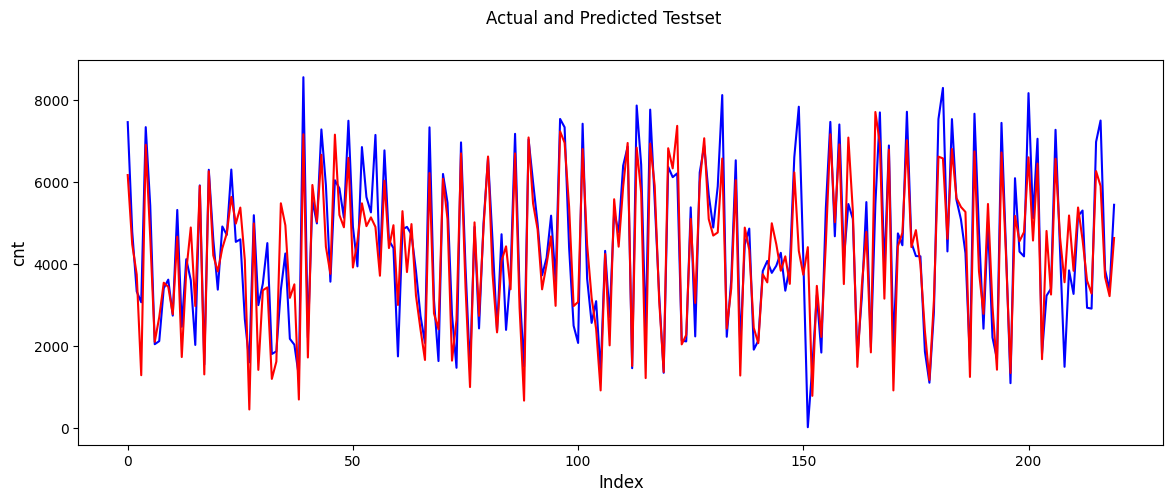

In [317]:
#Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted Testset', fontsize=12)              
plt.xlabel('Index', fontsize=12)                               
plt.ylabel('cnt', fontsize=12)                               
plt.show()

##### - Actual Vs Predicted overlaps almost, so the model is fine.

##### Error Terms Test

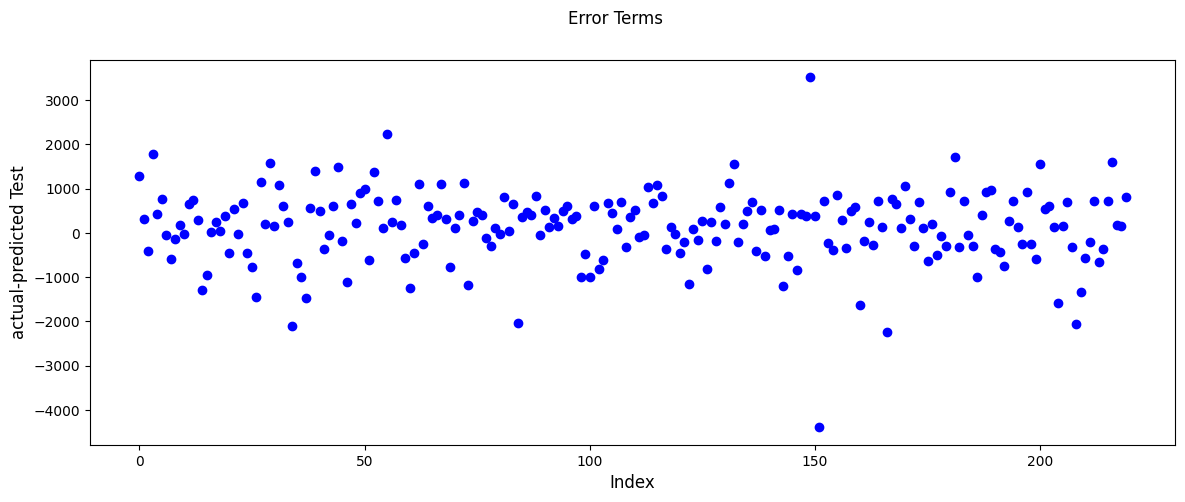

In [318]:
c = [i for i in range(0,len(y_test),1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, color="blue",marker='o', linewidth=1.25, linestyle=" ")
fig.suptitle('Error Terms', fontsize=12)
plt.xlabel('Index', fontsize=12)        
plt.ylabel('actual-predicted Test', fontsize=12)
plt.show()


Cross verifying the above conclusion using a qq-plot:

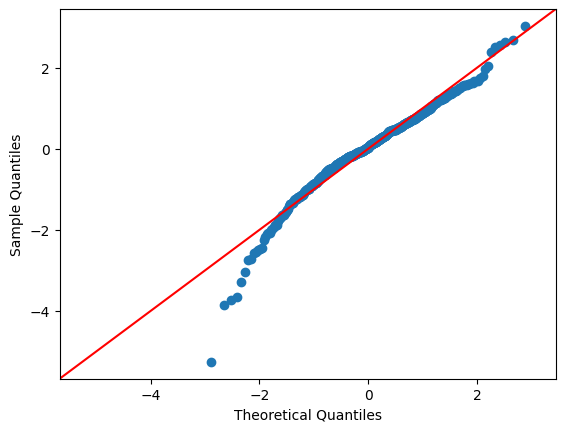

In [319]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()